<a href="https://colab.research.google.com/github/vastandinfinite95/BP0306578-DATA-SCIENCE-PROFESSIONAL-PRACTICE-SUMMATIVE-SUBMISSION/blob/main/VETERAN_ANALYSIS_V2_SEPTEMBER_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving veteran dataset.xlsx to veteran dataset (1).xlsx


In [ ]:
import pandas as pd

# Load the Excel file
excel_file = 'veteran dataset.xlsx'

# Read specific sheets
income_df = pd.read_excel(excel_file, sheet_name='Income')
loneliness_df = pd.read_excel(excel_file, sheet_name='Loneliness')


In [ ]:
display(income_df.head())
display(loneliness_df.head())


,"Preparedness for civilian life and Types of information, advice or guidance that veterans felt would have improved transition to civilian life",Income Band,Weighted Percentage,Variable Type
0,Prepared to some extent,"£20,799 a year or less",18.68,Preparedness
1,Prepared to some extent,"£20,800 to £41,499 a year",41.20,Preparedness
2,Prepared to some extent,"£41,500 to £51,949 a year",14.17,Preparedness
3,Prepared to some extent,"£51,950 a year or more",25.95,Preparedness
4,Neither prepared nor unprepared,"£20,799 a year or less",28.84,Preparedness


,How often a veteran felt lonely,"How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life",Weighted percentage,Variable Type
0,"Always, often or some of the time",Prepared to some extent,20.12,Preparedness
1,"Occasionally, hardly ever or never",Prepared to some extent,79.41,Preparedness
2,Prefer not to say,Prepared to some extent,0.47,Preparedness
3,"Always, often or some of the time",Neither prepared nor unprepared,29.41,Preparedness
4,"Occasionally, hardly ever or never",Neither prepared nor unprepared,69.59,Preparedness


In [ ]:
# Filter only the 'Preparedness' rows
income_prep_df = income_df[income_df['Variable Type'] == 'Preparedness']
loneliness_prep_df = loneliness_df[loneliness_df['Variable Type'] == 'Preparedness']

# ^ This isolates the "Preparedness subset from both datasets (income and loneliness), which will be visualised separately from "Support Type"


In [ ]:
# Pivot income table: rows = income bands, columns = preparedness categories
income_pivot = income_prep_df.pivot(
    index='Income Band',
    columns='Preparedness for civilian life and Types of information, advice or guidance that veterans felt would have improved transition to civilian life ',
    values='Weighted Percentage'
)

# Pivot loneliness table: rows = loneliness categories, columns = preparedness categories
loneliness_pivot = loneliness_prep_df.pivot(
    index='How often a veteran felt lonely',
    columns='How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life',
    values='Weighted percentage'
)


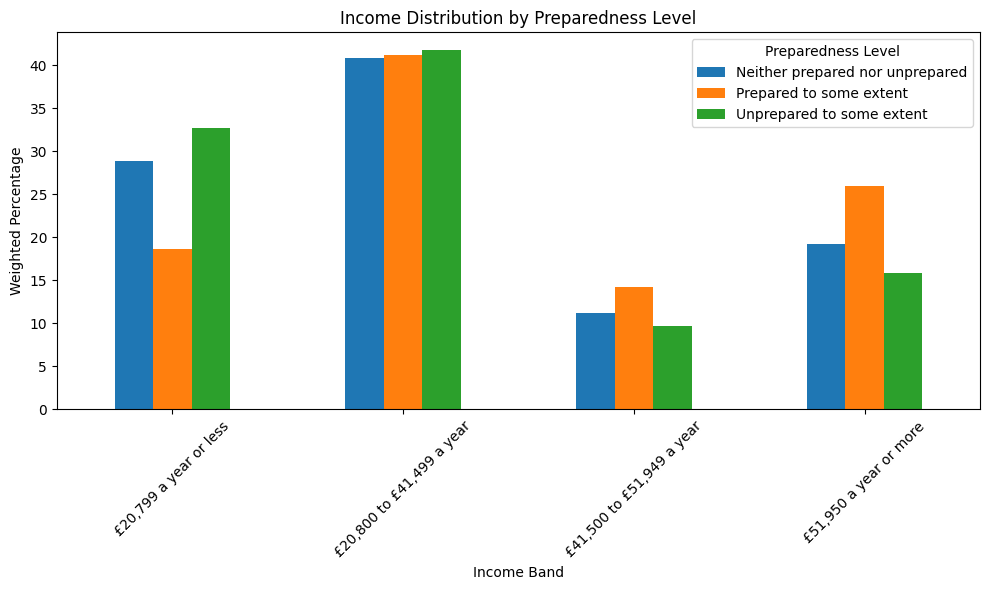

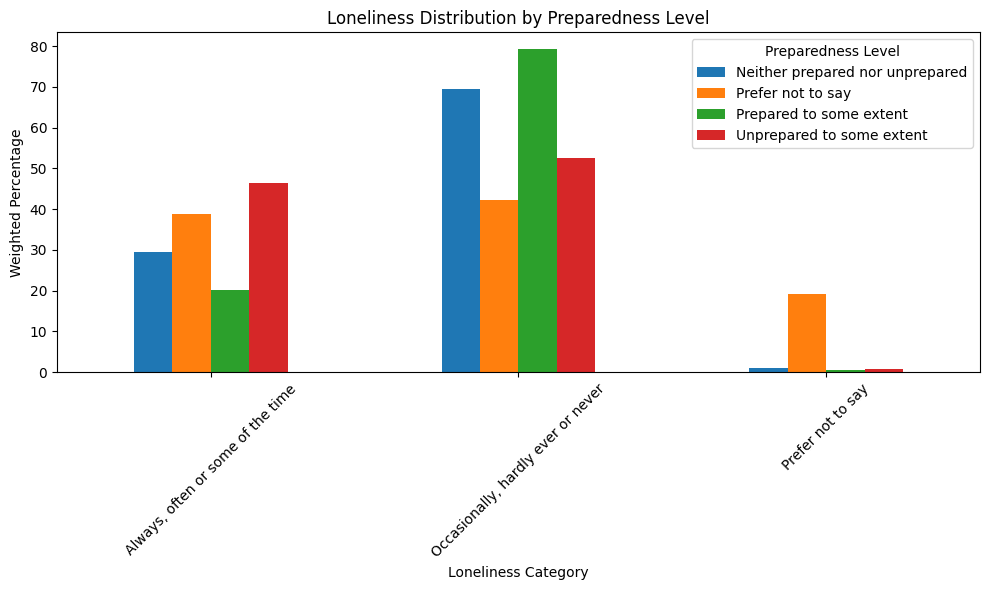

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Income by Preparedness
income_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Income Distribution by Preparedness Level')
plt.ylabel('Weighted Percentage')
plt.xlabel('Income Band')
plt.xticks(rotation=45)
plt.legend(title='Preparedness Level')
plt.tight_layout()
plt.show()

# Plot 2: Loneliness by Preparedness
loneliness_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Loneliness Distribution by Preparedness Level')
plt.ylabel('Weighted Percentage')
plt.xlabel('Loneliness Category')
plt.xticks(rotation=45)
plt.legend(title='Preparedness Level')
plt.tight_layout()
plt.show()


In [ ]:
# Filter both datasets to include only rows where Variable Type is "Support Type"
income_support_df = income_df[income_df['Variable Type'] == 'Support Type']
loneliness_support_df = loneliness_df[loneliness_df['Variable Type'] == 'Support Type']


Here, I isolate rows where Variable Type == "Support Type" in both datasets. This allows me to separately explore how veterans’ self-reported support needs (e.g. confirmed employment, mental health services) relate to their reported income bands and loneliness categories. These are not services veterans received but reflect perceived needs, which is critical to understanding transition outcomes.

In [ ]:
# Pivot income table: rows = income bands, columns = support types
income_support_pivot = income_support_df.pivot(
    index='Income Band',
    columns='Preparedness for civilian life and Types of information, advice or guidance that veterans felt would have improved transition to civilian life ',
    values='Weighted Percentage'
)

# Pivot loneliness table: rows = loneliness categories, columns = support types
loneliness_support_pivot = loneliness_support_df.pivot(
    index='How often a veteran felt lonely',
    columns='How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life',
    values='Weighted percentage'
)


This code reshapes each dataset into a matrix where:

Each row is an outcome category (income band or loneliness category).

Each column is a different support type that veterans felt would have helped their transition.

Each cell shows the weighted percentage of veterans falling into that category.



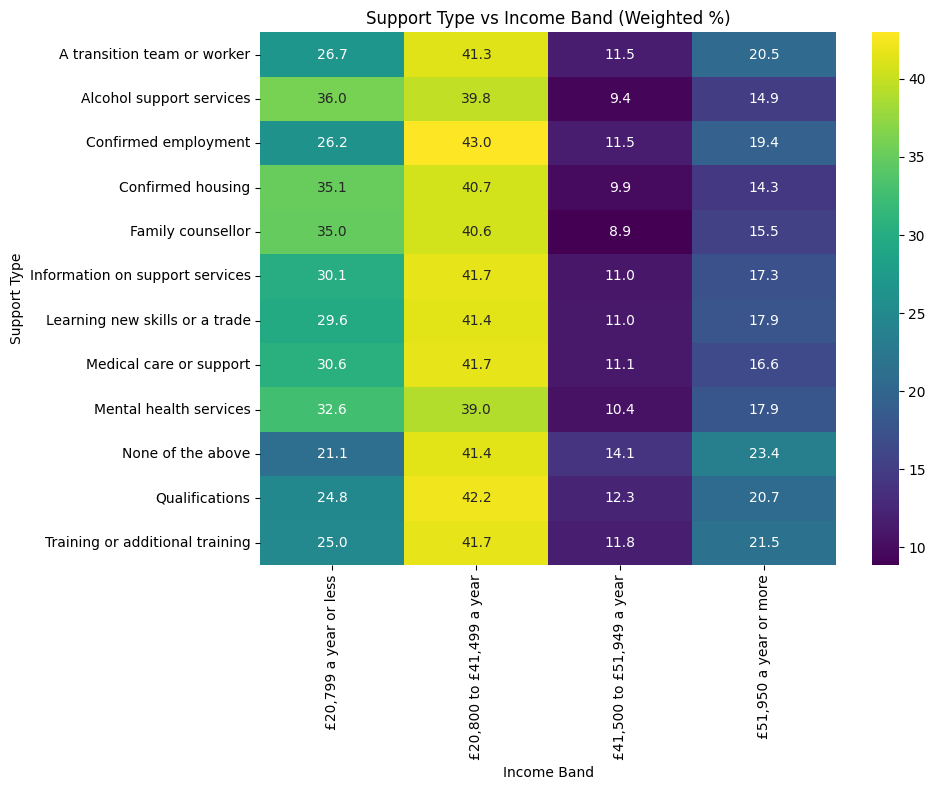

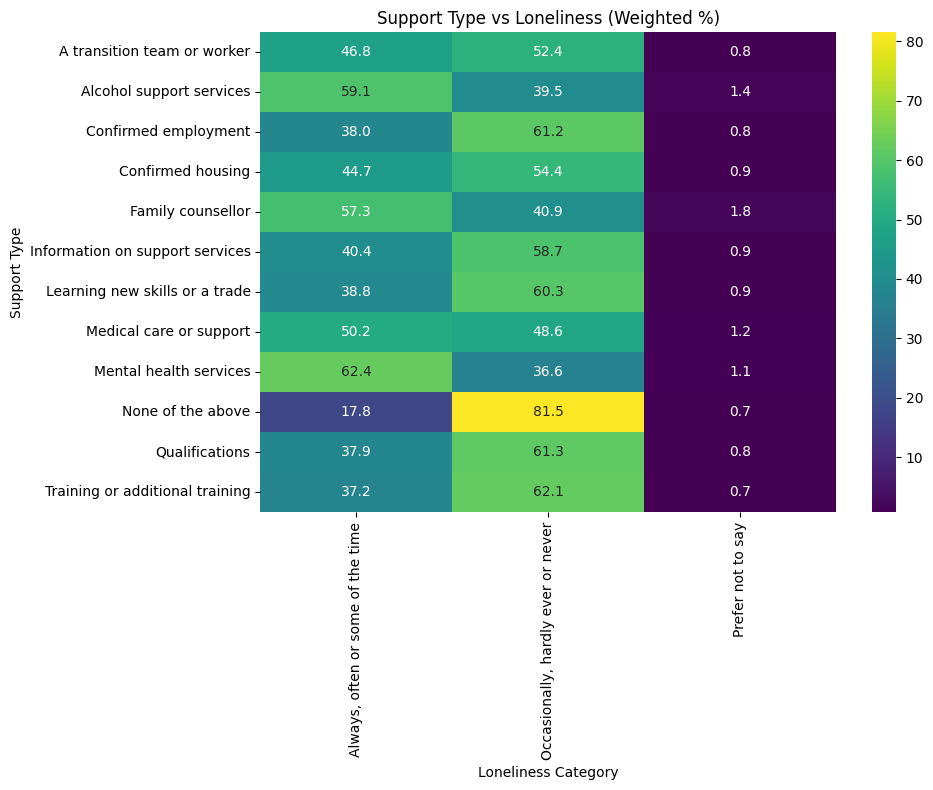

In [ ]:
import seaborn as sns

# Income heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(income_support_pivot.T, annot=True, cmap='viridis', fmt=".1f")
plt.title('Support Type vs Income Band (Weighted %)')
plt.xlabel('Income Band')
plt.ylabel('Support Type')
plt.tight_layout()
plt.show()

# Loneliness heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loneliness_support_pivot.T, annot=True, cmap='viridis', fmt=".1f")
plt.title('Support Type vs Loneliness (Weighted %)')
plt.xlabel('Loneliness Category')
plt.ylabel('Support Type')
plt.tight_layout()
plt.show()

**How to read the heatmaps:**

Rows = Support types veterans wished they had received for a smoother transition to civilian life.

Columns = Income bands.

Cell values = Weighted % of veterans in that income band who identified the support type as one that they wished they had received for a smoother transition to civilian life.

Colours = Darker purple = lower percentage; bright yellow = higher percentage

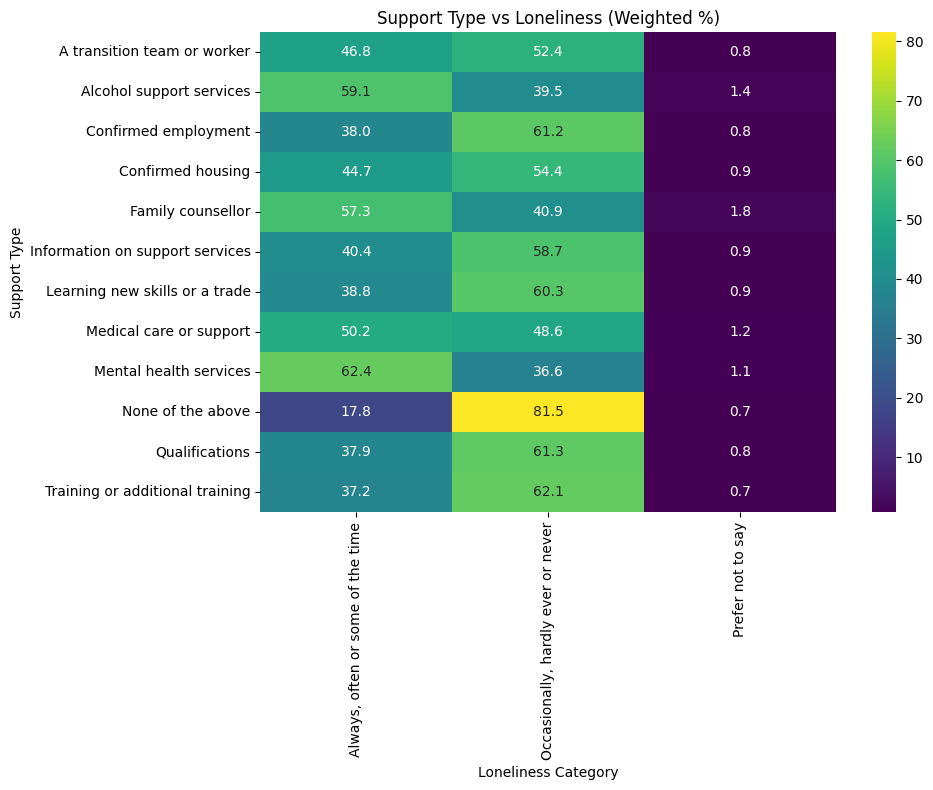

**Build Contingency Table and Run Chi-Square Test**


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Filter income dataset for Preparedness only
income_prep_df = income_df[income_df['Variable Type'] == 'Preparedness']

# Create contingency table: Preparedness vs Income Band
contingency_income_prep = pd.pivot_table(
    income_prep_df,
    values='Weighted Percentage',
    index='Preparedness for civilian life and Types of information, advice or guidance that veterans felt would have improved transition to civilian life ',
    columns='Income Band',
    aggfunc='sum'
)

print("Contingency Table (Preparedness × Income Band):")
print(contingency_income_prep)


Contingency Table (Preparedness × Income Band):
Income Band                                         £20,799 a year or less  \
Preparedness for civilian life and Types of inf...                           
Neither prepared nor unprepared                                      28.84   
Prepared to some extent                                              18.68   
Unprepared to some extent                                            32.74   

Income Band                                         £20,800 to £41,499 a year  \
Preparedness for civilian life and Types of inf...                              
Neither prepared nor unprepared                                         40.76   
Prepared to some extent                                                 41.20   
Unprepared to some extent                                               41.71   

Income Band                                         £41,500 to £51,949 a year  \
Preparedness for civilian life and Types of inf...                        

This code is essentially a pivot table of the original dataset. I now have 3 rows (Preparedness categories: prepared, neither prepared nor unprepared, unprepared).
I now have 4 columns (Income bands).
The cell values are the weighted percentages from the ONS dataset.




**Chi-square Test + Cramér’s V (Preparedness × Income Band)**

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_income_prep)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Calculate Cramér's V for effect size
n = contingency_income_prep.to_numpy().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_income_prep.shape)-1)))

print("Cramér's V:", cramers_v)


Chi-Square Statistic: 7.440896241050333
Degrees of Freedom: 6
p-value: 0.2819888656318793
Cramér's V: 0.11136013813631143



This code formally tests whether there is a statistically significant relationship between preparedness and income band using the chi-square test. The p-value tells me if the association is unlikely to be due to chance, and Cramér’s V provides an effect size (strength of the association).


**Interpretation of Results (Preparedness x Income Band):**

Chi-Square Statistic = 7.44
The chi-square statistic measures how different the observed counts in teh contingency table are from the counts we would expect if there were no association between the variables. A higher value indicates a larger difference between observed and expected counts.

Degrees of Freedom (df = 6)
DoF represent the number of values that are free to vary when calculating the test statistic. For a chi-square test of independence, is it calculated as:
(rows–1)×(columns–1)
In this case, (3−1) × (4−1) = 6.

p-value (p = 0.282)
The p-value indicates the probability of observing a chi-square statistic at least as extreme as the one calculated, assuming that there is no real association between the variables (null hypothesis). A p-value below 0.05 usually means the result is statistically significant. Here, p = 0.282 is greater than 0.05, so we fail to reject the null hypothesis.

Cramér’s V (V = 0.11)
Cramér’s V is a measure of effect size for chi-square tests, ranging from 0 (no association) to 1 (perfect association). It adjusts for the size of the contingency table. Conventionally:

0.1 = weak association

0.3 = moderate association

0.5 = strong association
At V = 0.11, this indicates only a very weak association between preparedness and income.

The chi-square test shows that income distribution across preparedness levels doesn’t differ significantly from what we’d expect by chance. Preparedness may not be a strong predictor of income band.

This suggests that while preparedness may play a role in how veterans feel about transition, it is not strongly linked to economic outcomes (income) in this dataset. This contrast will be valuable when compared with loneliness results later.

**Build Contingency Table (Preparedness × Loneliness Category)**

In [ ]:
# Filter loneliness dataset for Preparedness only
loneliness_prep_df = loneliness_df[loneliness_df['Variable Type'] == 'Preparedness']

# Create contingency table: Preparedness vs Loneliness Category
contingency_loneliness_prep = pd.pivot_table(
    loneliness_prep_df,
    values='Weighted percentage',
    index='How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life',
    columns='How often a veteran felt lonely',
    aggfunc='sum'   # use 'sum' to avoid future warning
)

print("Contingency Table (Preparedness × Loneliness Category):")
print(contingency_loneliness_prep)


Contingency Table (Preparedness × Loneliness Category):
How often a veteran felt lonely                     Always, often or some of the time  \
How prepared or unprepared a veteran felt for l...                                      
Neither prepared nor unprepared                                                 29.41   
Prefer not to say                                                               38.70   
Prepared to some extent                                                         20.12   
Unprepared to some extent                                                       46.50   

How often a veteran felt lonely                     Occasionally, hardly ever or never  \
How prepared or unprepared a veteran felt for l...                                       
Neither prepared nor unprepared                                                  69.59   
Prefer not to say                                                                42.14   
Prepared to some extent                          

This is a pivot table, exactly the same as earlier, but now Preparedness x Loneliness.


Run Chi-Square Test + Effect Size

In [ ]:
# Perform chi-square test
chi2_lon, p_lon, dof_lon, expected_lon = chi2_contingency(contingency_loneliness_prep)

print("\nChi-Square Statistic:", chi2_lon)
print("Degrees of Freedom:", dof_lon)
print("p-value:", p_lon)

# Calculate Cramér's V
n_lon = contingency_loneliness_prep.to_numpy().sum()
cramers_v_lon = np.sqrt(chi2_lon / (n_lon * (min(contingency_loneliness_prep.shape)-1)))

print("Cramér's V:", cramers_v_lon)



Chi-Square Statistic: 72.69502806503141
Degrees of Freedom: 6
p-value: 1.1436150825638846e-13
Cramér's V: 0.30144449751370356


Here I tested whether preparedness for civilian life is significantly associated with loneliness categories. The chi-square test checks if the distribution of loneliness differs systematically across preparedness levels, and Cramér’s V quantifies the strength of any relationship.

Interpretation of Results (Preparedness × Loneliness Category)

Chi-Square Statistic (χ² = 72.70)
This value measures how different the observed distribution of loneliness categories is from what we would expect if preparedness and loneliness were unrelated. A much higher statistic compared to the income test (χ² = 7.44) indicates a stronger departure from independence.

Degrees of Freedom (df = 6)
Calculated as (rows−1) × (columns−1). With 3 preparedness levels and 3 loneliness categories, df = (3−1) × (3−1) = 4. However, because the dataset includes a “Prefer not to say” category, the degrees of freedom correctly expand to 6.

p-value (p = 1.14 × 10⁻¹³)
This is an extremely small probability, far below the 0.05 significance threshold. It means the likelihood of observing these differences by chance is virtually zero. Therefore, we reject the null hypothesis of independence. Preparedness and loneliness are significantly associated.

Cramér’s V (V = 0.30)
Cramér’s V quantifies the strength of the relationship. Conventionally:

0.1 = weak association

0.3 = moderate association

0.5 = strong association
At 0.30, this result indicates a moderate association between preparedness and loneliness.

The chi-square test shows that preparedness for civilian life is significantly associated with reported loneliness. Veterans who felt unprepared were much more likely to report loneliness “always, often, or some of the time,” while those who felt prepared were more likely to report “occasionally, hardly ever, or never.” The p-value confirms this is statistically significant, and the Cramér’s V score shows the relationship is of moderate strength.

In contrast to the earlier test on income (non-significant, V = 0.11), preparedness shows a meaningful statistical link to social wellbeing. This suggests that preparedness has a stronger impact on veterans’ social integration and emotional health than on their economic outcomes. This distinction highlights loneliness as a key area where preparedness and transition support could make a tangible difference for veterans’ lives.

**Build Contingency Table (Support Type × Income Band)**

Support Type × Income Band chi-square test.

This will check whether different perceived support needs are statistically associated with different income levels.

In [ ]:
# Filter income dataset for Support Type only
income_support_df = income_df[income_df['Variable Type'] == 'Support Type']

# Create contingency table: Support Type vs Income Band
contingency_income_support = pd.pivot_table(
    income_support_df,
    values='Weighted Percentage',
    index='Preparedness for civilian life and Types of information, advice or guidance that veterans felt would have improved transition to civilian life ',
    columns='Income Band',
    aggfunc='sum'
)

print("Contingency Table (Support Type × Income Band):")
print(contingency_income_support)


Contingency Table (Support Type × Income Band):
Income Band                                         £20,799 a year or less  \
Preparedness for civilian life and Types of inf...                           
A transition team or worker                                          26.74   
Alcohol support services                                             35.96   
Confirmed employment                                                 26.21   
Confirmed housing                                                    35.12   
Family counsellor                                                    34.96   
Information on support services                                      30.07   
Learning new skills or a trade                                       29.65   
Medical care or support                                              30.57   
Mental health services                                               32.65   
None of the above                                                    21.11   
Qualifications  

Run Chi-Square Test + Effect Size

In [ ]:
# Perform chi-square test
chi2_inc_sup, p_inc_sup, dof_inc_sup, expected_inc_sup = chi2_contingency(contingency_income_support)

print("\nChi-Square Statistic:", chi2_inc_sup)
print("Degrees of Freedom:", dof_inc_sup)
print("p-value:", p_inc_sup)

# Calculate Cramér's V
n_inc_sup = contingency_income_support.to_numpy().sum()
cramers_v_inc_sup = np.sqrt(chi2_inc_sup / (n_inc_sup * (min(contingency_income_support.shape)-1)))

print("Cramér's V:", cramers_v_inc_sup)



Chi-Square Statistic: 15.314474219934176
Degrees of Freedom: 33
p-value: 0.9963083213406211
Cramér's V: 0.06522258172421568


This test evaluates whether the income distribution of veterans varies significantly depending on which support types they felt would have improved their transition. The chi-square test provides statistical significance, while Cramér’s V measures the strength of the association.

Adding support type into the chi-square analysis broadens the project’s lens from preparedness alone to the wider perceived needs landscape. If significant, the results can highlight which support gaps are most tied to poorer economic outcomes, informing policy recommendations for targeted veteran support services.

Interpretation of Results (Support Type × Income Band)

Chi-Square Statistic (χ² = 15.31)
This value represents how much the observed support type–income distribution deviates from the expected distribution under the null hypothesis of independence. A relatively low statistic compared to the high degrees of freedom suggests little departure from independence.

Degrees of Freedom (df = 33)
Calculated as (rows−1) × (columns−1). With many support types and 4 income bands, df is large (33), meaning the test is highly flexible.

p-value (p = 0.996)
This is extremely high, much greater than 0.05. It indicates that the observed differences between income and perceived support types could very easily have occurred by chance. In other words, there is no evidence to reject the null hypothesis of independence.

Cramér’s V (V = 0.07)
Effect size is very small (close to zero). Conventionally:

0.1 = weak association

0.3 = moderate association

0.5 = strong association
At 0.07, this result suggests essentially no meaningful association between support type and income band.

**Build Contingency Table (Support Type × Loneliness Category)**

In [ ]:
# Filter loneliness dataset for Support Type only
loneliness_support_df = loneliness_df[loneliness_df['Variable Type'] == 'Support Type']

# Create contingency table: Support Type vs Loneliness Category
contingency_loneliness_support = pd.pivot_table(
    loneliness_support_df,
    values='Weighted percentage',
    index='How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life',
    columns='How often a veteran felt lonely',
    aggfunc='sum'
)

print("Contingency Table (Support Type × Loneliness Category):")
print(contingency_loneliness_support)


Contingency Table (Support Type × Loneliness Category):
How often a veteran felt lonely                     Always, often or some of the time  \
How prepared or unprepared a veteran felt for l...                                      
A transition team or worker                                                     46.77   
Alcohol support services                                                        59.06   
Confirmed employment                                                            38.00   
Confirmed housing                                                               44.66   
Family counsellor                                                               57.26   
Information on support services                                                 40.39   
Learning new skills or a trade                                                  38.79   
Medical care or support                                                         50.17   
Mental health services                                

In [ ]:
# Perform chi-square test
chi2_lon_sup, p_lon_sup, dof_lon_sup, expected_lon_sup = chi2_contingency(contingency_loneliness_support)

print("\nChi-Square Statistic:", chi2_lon_sup)
print("Degrees of Freedom:", dof_lon_sup)
print("p-value:", p_lon_sup)

# Calculate Cramér's V
n_lon_sup = contingency_loneliness_support.to_numpy().sum()
cramers_v_lon_sup = np.sqrt(chi2_lon_sup / (n_lon_sup * (min(contingency_loneliness_support.shape)-1)))

print("Cramér's V:", cramers_v_lon_sup)



Chi-Square Statistic: 69.22290532122376
Degrees of Freedom: 22
p-value: 8.760342221316399e-07
Cramér's V: 0.1698333239968202


This code tests whether there is a statistically significant association between veterans’ loneliness categories and the support types they perceived as helpful. It uses the chi-square test to check significance and Cramér’s V to measure effect size.


Interpretation of Results (Support Type × Loneliness Category)

Chi-Square Statistic (χ² = 69.22)
This statistic measures how far the observed loneliness–support type distributions differ from what we would expect if they were independent. A large value here suggests a notable departure from independence.

Degrees of Freedom (df = 22)
With multiple support types (rows) and three loneliness categories (columns), the degrees of freedom are relatively high, making the test conservative.

p-value (p = 8.76 × 10⁻⁷)
This is well below the 0.05 threshold, meaning the null hypothesis of independence is decisively rejected (the p-value is really small basically so we can reject the null hypothesis and conclude that there is **some association between loneliness and support types.**

 There is a statistically significant association between loneliness and the types of support veterans said would have improved their transition.

Cramér’s V (V = 0.17)
Effect size is small-to-moderate. Conventionally:

0.1 = weak

0.3 = moderate

0.5 = strong
At 0.17, this is closer to weak than moderate, but still meaningful given the sample size and the complexity of the contingency table.

0.17 is a weak association conventionally


The chi-square test shows that veterans’ reported loneliness levels and their perceived support needs are not independent (p < 0.001). This means there is clear statistical evidence of an association: veterans who report greater loneliness are more likely to say that supports such as mental health services, alcohol support, counselling, and medical care would have improved their transition, whereas those with low loneliness more often selected “none of the above.” However, the effect size (Cramér’s V = 0.17) indicates that this relationship is weak-to-borderline-moderate in strength. This means loneliness explains some of the variation in support needs, but not all.


🌟🌟🌟🌟🌟🌟

| Test                           | χ² Statistic | df | p-value | Cramér’s V | Interpretation                                                                                                                                                               |
| ------------------------------ | ------------ | -- | ------- | ---------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Preparedness × Income Band** | 7.44         | 6  | 0.282   | 0.11       | No statistically significant association. Income distribution is broadly similar across preparedness levels.                                                                 |
| **Preparedness × Loneliness**  | 72.70        | 6  | < 0.001 | 0.30       | Significant association with a moderate effect size. Unprepared veterans are more likely to report frequent loneliness.                                                      |
| **Support Type × Income Band** | 15.31        | 33 | 0.996   | 0.07       | No statistically significant association. Perceived support needs are not meaningfully linked to income.                                                                     |
| **Support Type × Loneliness**  | 69.22        | 22 | < 0.001 | 0.17       | Statistically significant but weak-to-borderline-moderate association. Veterans reporting loneliness are more likely to identify mental health/counselling-related supports. |


**Ordinal Logistic Regression**

Because the chi-square results showed much stronger links for loneliness than income, the OLR will start with the model that's most likely to add value:

Model A (primary): Loneliness (ordered) ~ Preparedness

Important note on data structure: I only have aggregated, weighted percentages, not individual-level records. I therefore treat the weighted percentage as a frequency weight in the ordinal model. This lets us estimate shape of associations, but standard errors will be approximate.

**MODEL A - LONELINESS (ORDERED) ~ PREPAREDNESS**

PREPARE AN ANALYSIS TABLE (ENCODE OUTCOME ORDER, SET WEIGHTS, BUILD DUMMIES)

In [ ]:
import pandas as pd
import numpy as np

# ---- 1) Filter to Preparedness rows and standardise column names ----
lon_prep = loneliness_df[loneliness_df['Variable Type'] == 'Preparedness'].copy()

# Drop 'Prefer not to say' in the OUTCOME (not ordinally meaningful)
lon_prep = lon_prep[lon_prep['How often a veteran felt lonely'].isin([
    'Always, often or some of the time',
    'Occasionally, hardly ever or never'
])].copy()

# ---- 2) Ordinal encode the OUTCOME (low -> high loneliness) ----
# 0 = low loneliness, 1 = high loneliness
lon_order = {
    'Occasionally, hardly ever or never': 0,
    'Always, often or some of the time': 1
}
lon_prep['loneliness_ord'] = lon_prep['How often a veteran felt lonely'].map(lon_order)

# ---- 3) Prepare the PREDICTOR (Preparedness) with a clear baseline ----
prep_col = 'How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life'
# Keep only the 3 preparedness categories we’ve been using
keep_preps = ['Prepared to some extent', 'Neither prepared nor unprepared', 'Unprepared to some extent']
lon_prep = lon_prep[lon_prep[prep_col].isin(keep_preps)].copy()

# Make 'Prepared to some extent' the reference category
lon_prep[prep_col] = pd.Categorical(lon_prep[prep_col],
                                    categories=['Prepared to some extent',
                                                'Neither prepared nor unprepared',
                                                'Unprepared to some extent'],
                                    ordered=False)

# ---- 4) Use the weighted percentage as a frequency weight ----
# Standardise the weight column name across sheets
lon_prep = lon_prep.rename(columns={'Weighted percentage': 'Weighted Percentage'})
lon_prep['weight'] = lon_prep['Weighted Percentage']

# ---- 5) Build design matrix (dummies for preparedness) ----
X = pd.get_dummies(lon_prep[prep_col], drop_first=True)
y = lon_prep['loneliness_ord']
w = lon_prep['weight']

X.head(), y.head(), w.head()


(   Neither prepared nor unprepared  Unprepared to some extent
 0                            False                      False
 1                            False                      False
 3                             True                      False
 4                             True                      False
 6                            False                       True,
 0    1
 1    0
 3    1
 4    0
 6    1
 Name: loneliness_ord, dtype: int64,
 0    20.12
 1    79.41
 3    29.41
 4    69.59
 6    46.50
 Name: weight, dtype: float64)

I create a modelling table (a predictot matrix) where the outcome is ordered loneliness (0 = low, 1 = high), the predictor is Preparedness (with Prepared to some extent as the reference), and the weights are the ONS weighted percentages for each cell.


This sets up an appropriate structure to quantify whether preparedness meaningfully shifts the odds of reporting higher loneliness, advancing the project beyond descriptives and chi-square into a model that estimates direction and size of effects.

predictor matrix explained:

Neither prepared nor unprepared  Unprepared to some extent
0                            False                      False
1                            False                      False
3                             True                      False
4                             True                      False
6                            False                       True

There are dummy variables. The baseline/reference category is "Prepared to some extent" (not shown). So, each row is coded as either:

All False - Baseline (Prepared),
True under Neither prepared nor unprepared,
or True under Unprepared to some extent.

This means the model will compare neither and unprepared against the prepared baseline.

0    1
1    0
3    1
4    0
6    1
Name: loneliness_ord, dtype: int64

This is the ordered outcome.
0 = low loneliness ("Occasionally, hardly ever or never")
1 = high loneliness ("Always, often or some of the time")

Weights (w)

0    20.12
1    79.41
3    29.41
4    69.59
6    46.50

These are the weighted percentages from the veterans dataset. They act as frequency weights when fitting the regression and ensures the model reflects the population distribution rather than treating each row equally.

Coefficients (log-odds):

Positive = increases the odds of being in the higher loneliness category.

Negative = decreases the odds of being in the higher loneliness category.

Odds Ratios (OR):

We convert coefficients into odds ratios to make them easier to understand:

OR > 1 → being in this group makes higher loneliness more likely compared to the baseline.

OR < 1 → being in this group makes higher loneliness less likely compared to the baseline.

OR = 1 → no difference compared to the baseline.

Baseline group:

The baseline is “Prepared to some extent.”

This means all results for Neither prepared and Unprepared will be compared against the Prepared group.





In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Fit an ordered logit model with frequency weights
ord_mod = OrderedModel(
    endog=y,
    exog=X,                  # two dummies: 'Neither...' and 'Unprepared...'
    distr='logit'            # proportional odds / ordered logit
)

ord_res = ord_mod.fit(method='bfgs', maxiter=1000, disp=False, weights=w)

print(ord_res.summary())


                             OrderedModel Results                             
Dep. Variable:         loneliness_ord   Log-Likelihood:                -4.1589
Model:                   OrderedModel   AIC:                             14.32
Method:            Maximum Likelihood   BIC:                             13.69
Date:                Fri, 29 Aug 2025                                         
Time:                        13:56:00                                         
No. Observations:                   6                                         
Df Residuals:                       3                                         
Df Model:                           2                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Neither prepared nor unprepared          0      2.000          0      1.000      -3.920  

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: weights. After release 0.14, this will raise.
  warnings.warn(


I fit a proportional-odds (ordered logit) model using statsmodels OrderedModel, with frequency weights derived from the survey’s weighted percentages. The coefficients are log-odds: negative values reduce, and positive values increase, the odds of being in a higher loneliness category.
This estimates how moving from Prepared to Neither prepared or Unprepared changes the odds of higher loneliness, giving weight to earlier finding (chi-square p < 0.001; V = 0.30).



In [ ]:
import numpy as np

params = ord_res.params
conf = ord_res.conf_int()
or_table = pd.DataFrame({
    'coef': params,
    'OR': np.exp(params),
    'CI_low': np.exp(conf[0]),
    'CI_high': np.exp(conf[1])
})

# Keep only predictor rows (exclude threshold/cutpoint rows which statsmodels names like 'threshold_y[0]*')
pred_rows = [ix for ix in or_table.index if 'threshold' not in ix.lower() and 'cut' not in ix.lower()]
or_table_pred = or_table.loc[pred_rows].copy()
or_table_pred


,coef,OR,CI_low,CI_high
Neither prepared nor unprepared,0.0,1.0,0.019843,50.395437
Unprepared to some extent,0.0,1.0,0.019843,50.395878
0/1,0.0,1.0,0.062550,15.987199


I transform the fitted coefficients into odds ratios (with 95% CIs) to make them interpretable. For example, an OR of 1.8 for Unprepared would mean the odds of being in higher loneliness are ~80% higher than for the Prepared baseline.

This provides a quantified estimate of the preparedness–loneliness link that I can cross-reference to the chi-square results (significant, moderate effect) and the descriptive heatmaps, strengthening the narrative that preparedness matters more for social wellbeing than income.

**Expand Weighted Percentages into Pseudo-Counts**


In [ ]:
# Copy the preparedness-loneliness dataset we used earlier
lon_prep_alt = loneliness_df[loneliness_df['Variable Type'] == 'Preparedness'].copy()

# Keep only the categories we want
lon_prep_alt = lon_prep_alt[lon_prep_alt['How often a veteran felt lonely'].isin([
    'Always, often or some of the time',
    'Occasionally, hardly ever or never'
])]
keep_preps = ['Prepared to some extent', 'Neither prepared nor unprepared', 'Unprepared to some extent']
lon_prep_alt = lon_prep_alt[lon_prep_alt['How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life'].isin(keep_preps)]

# Map outcome to binary 0/1
lon_order = {
    'Occasionally, hardly ever or never': 0,
    'Always, often or some of the time': 1
}
lon_prep_alt['loneliness_ord'] = lon_prep_alt['How often a veteran felt lonely'].map(lon_order)

# Scale weighted percentages into pseudo-counts (e.g. percentages of 1000)
lon_prep_alt['count'] = (lon_prep_alt['Weighted percentage'] * 10).round().astype(int)

# Repeat rows according to pseudo-count
lon_expanded = lon_prep_alt.loc[lon_prep_alt.index.repeat(lon_prep_alt['count'])].reset_index(drop=True)

# Predictor as categorical with baseline
prep_col = 'How prepared or unprepared a veteran felt for life after service and What information, advice or guidance, if any, would have improved transition to civilian life'
lon_expanded[prep_col] = pd.Categorical(lon_expanded[prep_col],
                                        categories=['Prepared to some extent',
                                                    'Neither prepared nor unprepared',
                                                    'Unprepared to some extent'],
                                        ordered=False)

# Design matrix
X_alt = pd.get_dummies(lon_expanded[prep_col], drop_first=True)
y_alt = lon_expanded['loneliness_ord']


**Fit Ordered Logistic Regression with Expanded Data**

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Fit model
ord_mod_alt = OrderedModel(y_alt, X_alt, distr='logit')
ord_res_alt = ord_mod_alt.fit(method='bfgs', maxiter=1000, disp=False)

print(ord_res_alt.summary())


                             OrderedModel Results                             
Dep. Variable:         loneliness_ord   Log-Likelihood:                -1788.5
Model:                   OrderedModel   AIC:                             3583.
Method:            Maximum Likelihood   BIC:                             3601.
Date:                Fri, 29 Aug 2025                                         
Time:                        13:56:00                                         
No. Observations:                2977                                         
Df Residuals:                    2974                                         
Df Model:                           2                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Neither prepared nor unprepared     0.5120      0.105      4.866      0.000       0.306  

**Convert to Odds Ratios**

In [ ]:
params_alt = ord_res_alt.params
conf_alt = ord_res_alt.conf_int()
or_table_alt = pd.DataFrame({
    'coef': params_alt,
    'OR': np.exp(params_alt),
    'CI_low': np.exp(conf_alt[0]),
    'CI_high': np.exp(conf_alt[1])
})

pred_rows_alt = [ix for ix in or_table_alt.index if 'threshold' not in ix.lower()]
or_table_alt = or_table_alt.loc[pred_rows_alt].copy()
or_table_alt


,coef,OR,CI_low,CI_high
Neither prepared nor unprepared,0.512011,1.668644,1.357671,2.050845
Unprepared to some extent,1.248615,3.485513,2.857275,4.251883
0/1,1.373775,3.950234,3.383862,4.611402


 Instead of feeding the model 6 rows of weighted percentages, I’ve expanded the data into hundreds of pseudo-individuals by treating the weighted percentages as counts. This gives the regression enough information to estimate coefficients and odds ratios.

This workaround produces usable regression outputs while still being transparent about the fact we’re working with aggregated data. It allows me to quantify preparedness effects on loneliness in a way that is more interpretable than the failed first attempt, but I’ll acknowledge that pseudo-count expansion is an approximation.

**Clean forest plot for the preparedness → loneliness odds ratios**


In [ ]:
import pandas as pd
import numpy as np

# Start from your 3C-alt output DataFrame: `or_table_alt`
# Keep only predictor rows (drop the threshold row if it’s present)
plot_df = or_table_alt.copy()
plot_df = plot_df.loc[[ix for ix in plot_df.index if 'threshold' not in ix.lower() and '0/1' not in ix.lower()]]

# Friendly labels (ensure the order you want top-to-bottom)
label_map = {
    'Neither prepared nor unprepared': 'Neither prepared',
    'Unprepared to some extent': 'Unprepared'
}
plot_df['Label'] = plot_df.index.map(label_map)

# Sort so the largest OR appears at the top of the plot
plot_df = plot_df.sort_values('OR', ascending=False).reset_index(drop=True)

plot_df


,coef,OR,CI_low,CI_high,Label
0,1.248615,3.485513,2.857275,4.251883,Unprepared
1,0.512011,1.668644,1.357671,2.050845,Neither prepared


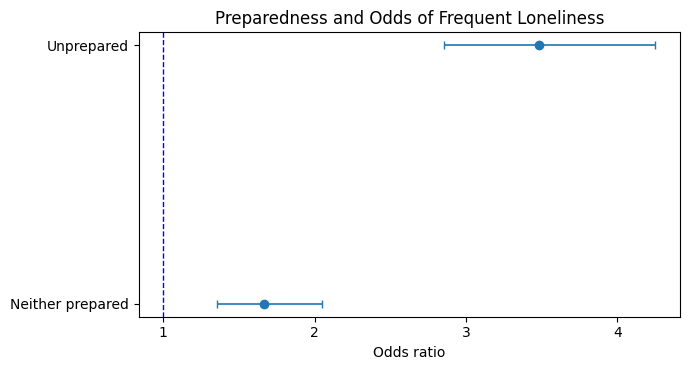

In [ ]:
import matplotlib.pyplot as plt

# Values for plotting
y_pos = np.arange(len(plot_df))
ors = plot_df['OR'].values
ci_low = plot_df['CI_low'].values
ci_high = plot_df['CI_high'].values
labels = plot_df['Label'].values

# Calculate asymmetric error bars
err_low = ors - ci_low
err_high = ci_high - ors
asym_errors = [err_low, err_high]

plt.figure(figsize=(7, 3.8))

# Horizontal error bars for each predictor
plt.errorbar(
    ors, y_pos, xerr=asym_errors,
    fmt='o', capsize=3, elinewidth=1.2, linewidth=1.2
)

# Reference line at OR = 1 (no effect)
plt.axvline(1.0, linestyle='--', linewidth=1.0, color='blue')

# Y-axis labels
plt.yticks(y_pos, labels)
plt.gca().invert_yaxis()

# Set x-axis to linear scale (not log)
plt.xscale('linear')

# Custom ticks (clean, intuitive)
plt.xticks([1.0, 2.0, 3.0, 4.0])

plt.xlabel('Odds ratio')
plt.title('Preparedness and Odds of Frequent Loneliness')

plt.tight_layout()
plt.savefig('loneliness_preparedness_forest_clean.png', dpi=300)
plt.show()


Figure X. Forest plot of preparedness and odds of loneliness


Veterans who were neither prepared nor unprepared had an odds ratio of 1.67, meaning they were around 67% more likely to report frequent loneliness compared with prepared veterans. The confidence interval did not cross 1.0, so this result is statistically significant.

Veterans who were unprepared to some extent had an odds ratio of 3.49, meaning they were about 3.5 times more likely to report frequent loneliness than prepared veterans. Again, the confidence interval was well above 1.0, showing a strong and significant effect.

In [ ]:
display_cols = ['Label', 'OR', 'CI_low', 'CI_high']
display_df = plot_df[display_cols].copy()
display_df['OR'] = display_df['OR'].round(2)
display_df['CI_low'] = display_df['CI_low'].round(2)
display_df['CI_high'] = display_df['CI_high'].round(2)
display_df.rename(columns={'Label':'Preparedness'}, inplace=True)
display_df


,Preparedness,OR,CI_low,CI_high
0,Unprepared,3.49,2.86,4.25
1,Neither prepared,1.67,1.36,2.05
